# Database Connection Check - AWS

- [Sentinel-2 Cloud Cover Segmentation Dataset](https://source.coop/repositories/radiantearth/cloud-cover-detection-challenge/description)

In [1]:
%%bash
aws configure list

      Name                    Value             Type    Location
      ----                    -----             ----    --------
   profile                <not set>             None    None
access_key     ****************M36H shared-credentials-file    
secret_key     ****************yvE3 shared-credentials-file    
    region                us-east-1      config-file    ~/.aws/config


In [2]:
%%bash
AWS_SOURCE=s3://radiantearth/cloud-cover-detection-challenge/documentation.pdf
aws s3 cp $AWS_SOURCE . --endpoint-url=https://data.source.coop

download: s3://radiantearth/cloud-cover-detection-challenge/documentation.pdf to ./documentation.pdf


In [3]:
%%bash

AWS_SOURCE_1=s3://radiantearth/cloud-cover-detection-challenge/final/public/train_metadata.csv
AWS_SOURCE_2=s3://radiantearth/cloud-cover-detection-challenge/final/private/test_metadata.csv

for variable in $AWS_SOURCE_1 $AWS_SOURCE_2
do 
    aws s3 cp $variable . --endpoint-url=https://data.source.coop
done

download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_metadata.csv to ./train_metadata.csv
download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_metadata.csv to ./test_metadata.csv


# Create the list of file!

1 Sample Size: 2307.8 KB  = 256.6 (Mask) + 512.8 (Band2) + 512.8 (Band3) + 512.8 (Band4) + 512.8 (Band8)

Training Data Total Size: 26 GB = 11748 ea x 2307.8 KB

Test Data Total Size: 24 GB = 10980 ea x 2307.8 KB

## EDA - Original dataset

In [4]:
import pandas as pd

In [5]:
train_df = pd.read_csv('./train_metadata.csv')
test_df = pd.read_csv('./test_metadata.csv')

print(len(train_df), len(test_df))

11748 10980


In [6]:
train_df.head()

,chip_id,location,datetime,cloudpath
0,adwp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwp
1,adwu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwu
2,adwz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwz
3,adxp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adxp
4,aeaj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aeaj


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

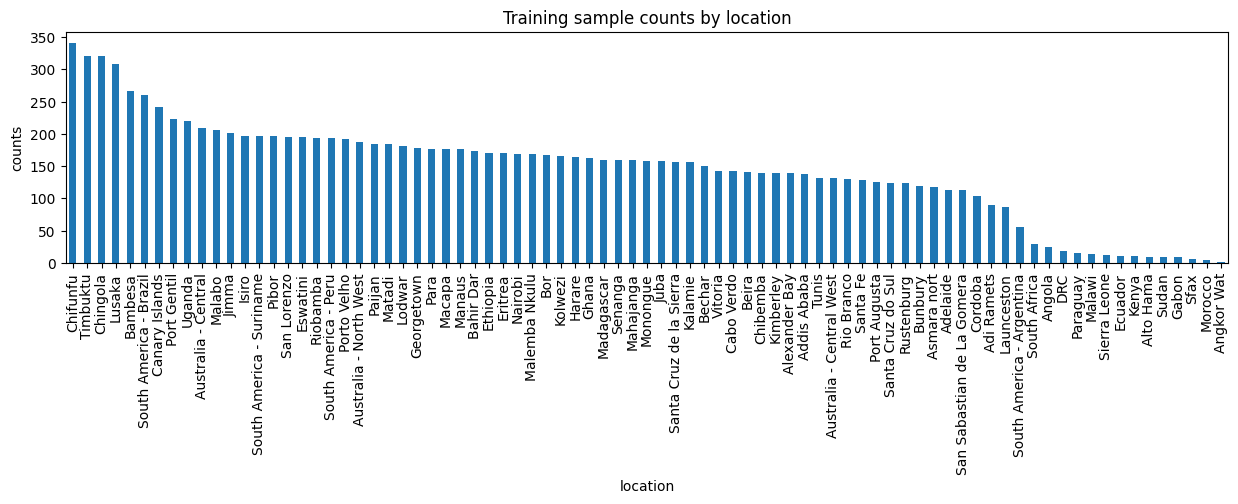

In [7]:
train_by_loc = train_df.groupby('location').count()
train_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', 
                                                          ylabel='counts', title='Training sample counts by location')

In [8]:
test_df.head()

,chip_id,location,datetime
0,aaaa,Australia - Central East,2020-06-03T00:55:26Z
1,aaay,Australia - Central East,2020-06-03T00:55:26Z
2,aabb,Australia - Central East,2020-06-03T00:55:26Z
3,aabd,Australia - Central East,2020-06-03T00:55:26Z
4,aabl,Australia - Central East,2020-06-03T00:55:26Z


<Axes: title={'center': 'Test sample counts by location'}, xlabel='location', ylabel='counts'>

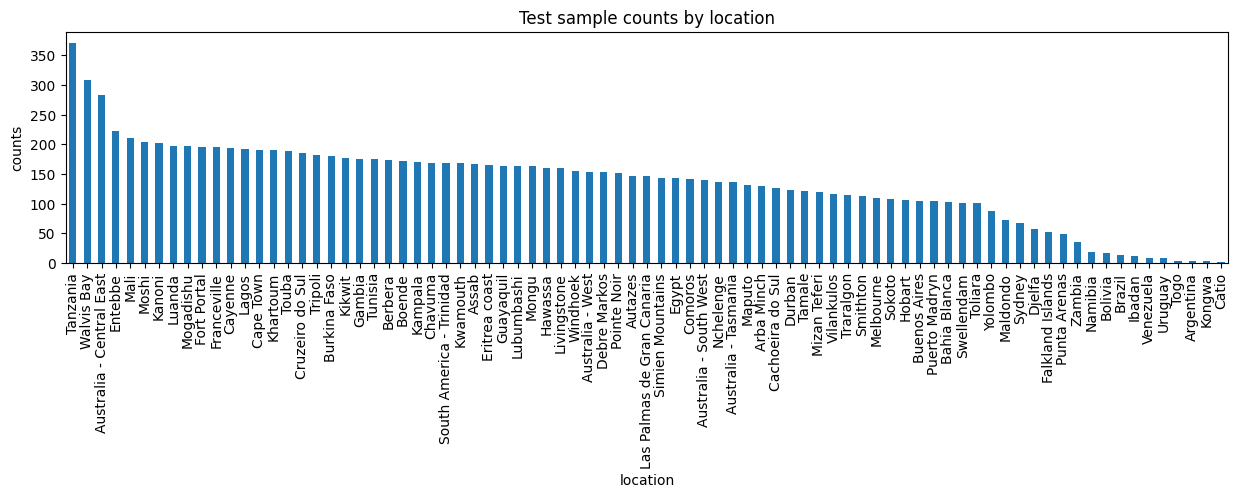

In [9]:
test_by_loc = test_df.groupby('location').count()
test_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar',
                                                         ylabel='counts', title='Test sample counts by location')

## Random Sampling

- train : 585 samples (5% Random by loc)
- test : 547 samples (5% Random by loc)

In [27]:
SAMPLE_RATE = 0.02

In [33]:
train_id_mask = train_df.groupby("location")["chip_id"].sample(frac=SAMPLE_RATE, random_state=42)
test_id_mask = test_df.groupby("location")["chip_id"].sample(frac=SAMPLE_RATE, random_state=42)

train_size = len(train_id_mask) * 2307.8 / 1024 / 1024
test_size = len(test_id_mask) * 2307.8 / 1024 / 1024

print(f"Train : {len(train_id_mask)} ({train_size:.2f} GB)\n" \
      f"Test : {len(test_id_mask)} ({test_size:.2f} GB)")


Train : 230 (0.51 GB)
Test : 215 (0.47 GB)


In [34]:
s_train_df = train_df.loc[train_id_mask.index].sort_values('chip_id')
s_train_df.head()


,chip_id,location,datetime,cloudpath
33,aewm,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aewm
66,afxz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/afxz
76,agex,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agex
104,agtu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/agtu
135,ahtj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/ahtj


In [35]:
s_test_df = test_df.loc[test_id_mask.index].sort_values('chip_id')
s_test_df.head()

,chip_id,location,datetime
41,abft,Australia - Central East,2020-06-03T00:55:26Z
101,adgb,Australia - Central East,2020-06-03T00:55:26Z
118,advd,Australia - Central East,2020-06-03T00:55:26Z
125,awhj,Luanda,2020-09-07T09:33:08Z
153,axel,Luanda,2020-09-07T09:33:08Z


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

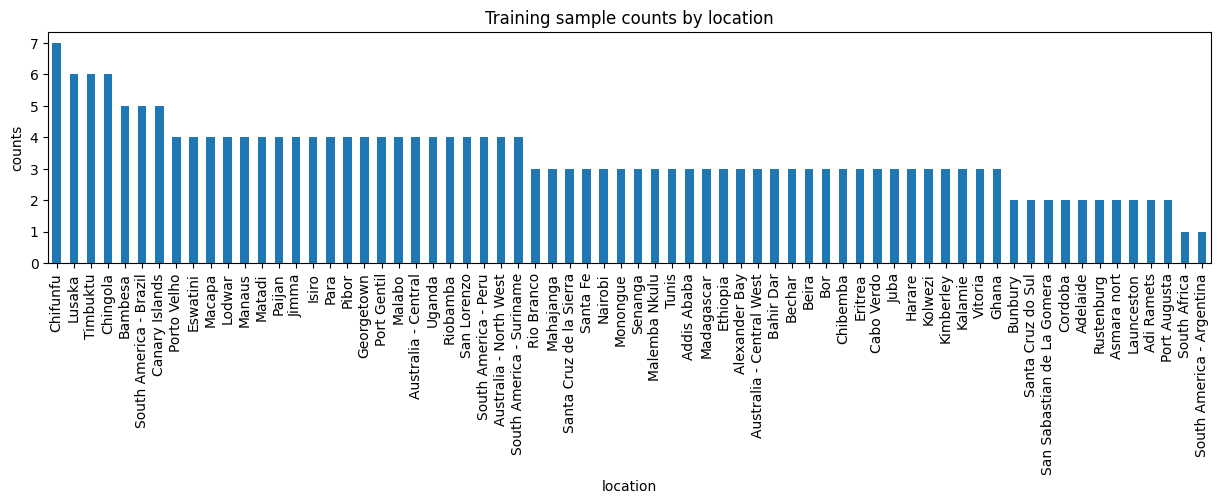

In [36]:
s_train_by_loc = s_train_df.groupby('location').count()
s_train_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', 
                                                          ylabel='counts', title='Training sample counts by location')

<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

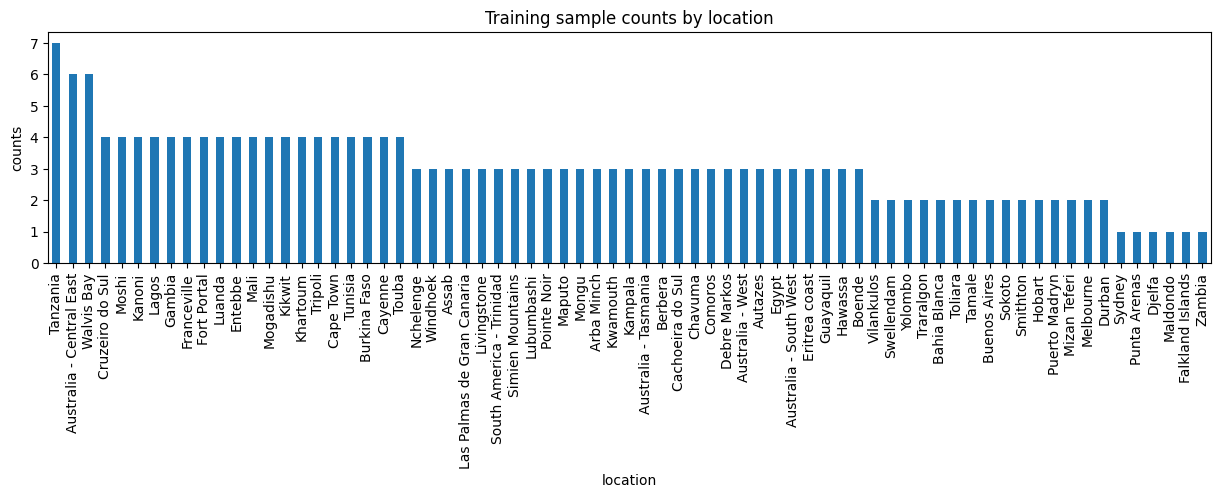

In [37]:
s_test_by_loc = s_test_df.groupby('location').count()
s_test_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', 
                                                          ylabel='counts', title='Training sample counts by location')

In [38]:
s_train_df.to_csv('s_train_metadata.csv', index=False)
s_test_df.to_csv('s_test_metadata.csv', index=False)

# Create Small Dataset

In [39]:
%%bash

mkdir -p ./Small_S2_CloudCover_Seg/public/train_features
mkdir -p ./Small_S2_CloudCover_Seg/public/train_labels
mkdir -p ./Small_S2_CloudCover_Seg/private/test_features
mkdir -p ./Small_S2_CloudCover_Seg/private/test_labels

In [40]:
%%bash

SKIP_HEADERS=1
DST_ROOT=./Small_S2_CloudCover_Seg/public
while IFS=, read -r col1 col2
do
    if ((SKIP_HEADERS))
    then
        ((SKIP_HEADERS--))
    else

        # Download Features
        AWS_SOURCE_FEATURE=s3://radiantearth/cloud-cover-detection-challenge/final/public/train_features/$col1
        aws s3 cp $AWS_SOURCE_FEATURE $DST_ROOT/train_features/$col1 --recursive --quiet --endpoint-url=https://data.source.coop 

        # Download Labels
        AWS_SOURCE_LABEL=s3://radiantearth/cloud-cover-detection-challenge/final/public/train_labels/$col1.tif
        aws s3 cp $AWS_SOURCE_LABEL $DST_ROOT/train_labels --quiet --endpoint-url=https://data.source.coop

        # Echo
        TIME="`date "+%Y-%m-%d %H:%M:%S"`"
        echo $TIME Done : $col1 
    fi
done < s_train_metadata.csv

2025-02-19 12:36:49 Done : aewm
2025-02-19 12:37:01 Done : afxz
2025-02-19 12:37:13 Done : agex
2025-02-19 12:37:24 Done : agtu
2025-02-19 12:37:36 Done : ahtj
2025-02-19 12:37:49 Done : ajxq
2025-02-19 12:38:00 Done : alyp
2025-02-19 12:38:13 Done : amog
2025-02-19 12:38:25 Done : aoqh
2025-02-19 12:38:37 Done : aqda
2025-02-19 12:38:49 Done : arsa
2025-02-19 12:39:01 Done : aswc
2025-02-19 12:39:13 Done : aszi
2025-02-19 12:39:24 Done : atjv
2025-02-19 12:39:36 Done : aurn
2025-02-19 12:39:47 Done : bgfr
2025-02-19 12:40:00 Done : bgjn
2025-02-19 12:40:12 Done : bigd
2025-02-19 12:40:24 Done : bkqj
2025-02-19 12:40:36 Done : brms
2025-02-19 12:40:47 Done : bsoa
2025-02-19 12:40:59 Done : burt
2025-02-19 12:41:12 Done : bvjo
2025-02-19 12:41:23 Done : bvzx
2025-02-19 12:41:35 Done : bzlo
2025-02-19 12:41:47 Done : cbvd
2025-02-19 12:41:59 Done : cdrd
2025-02-19 12:42:10 Done : cdwv
2025-02-19 12:42:22 Done : cjyc
2025-02-19 12:42:35 Done : ckpd
2025-02-19 12:42:47 Done : cldk
2025-02-

In [41]:
%%bash

SKIP_HEADERS=1
DST_ROOT=./Small_S2_CloudCover_Seg/private
while IFS=, read -r col1 col2
do
    if ((SKIP_HEADERS))
    then
        ((SKIP_HEADERS--))
    else

        # Download Features
        AWS_SOURCE_FEATURE=s3://radiantearth/cloud-cover-detection-challenge/final/private/test_features/$col1
        aws s3 cp $AWS_SOURCE_FEATURE $DST_ROOT/test_features/$col1 --recursive --quiet --endpoint-url=https://data.source.coop 

        # Download Labels
        AWS_SOURCE_LABEL=s3://radiantearth/cloud-cover-detection-challenge/final/private/test_labels/$col1.tif
        aws s3 cp $AWS_SOURCE_LABEL $DST_ROOT/test_labels --quiet --endpoint-url=https://data.source.coop

        # Echo
        TIME="`date "+%Y-%m-%d %H:%M:%S"`"
        echo $TIME Done : $col1 
        
    fi
done < s_test_metadata.csv

2025-02-19 13:22:47 Done : abft
2025-02-19 13:22:59 Done : adgb
2025-02-19 13:23:11 Done : advd
2025-02-19 13:23:22 Done : awhj
2025-02-19 13:23:34 Done : axel
2025-02-19 13:23:46 Done : bbeg
2025-02-19 13:23:57 Done : bbvm
2025-02-19 13:24:10 Done : bdqo
2025-02-19 13:24:23 Done : bdzs
2025-02-19 13:24:35 Done : bmlo
2025-02-19 13:24:47 Done : bpsk
2025-02-19 13:24:59 Done : bqkq
2025-02-19 13:25:11 Done : brey
2025-02-19 13:25:23 Done : cexv
2025-02-19 13:25:35 Done : ciao
2025-02-19 13:25:46 Done : cigv
2025-02-19 13:25:57 Done : cwvf
2025-02-19 13:26:09 Done : cxie
2025-02-19 13:26:21 Done : cxvo
2025-02-19 13:26:33 Done : dqts
2025-02-19 13:26:45 Done : dsec
2025-02-19 13:26:58 Done : eagf
2025-02-19 13:27:09 Done : eaph
2025-02-19 13:27:22 Done : ebdg
2025-02-19 13:27:34 Done : eccj
2025-02-19 13:27:46 Done : eftx
2025-02-19 13:27:59 Done : egcf
2025-02-19 13:28:11 Done : eibx
2025-02-19 13:28:22 Done : epof
2025-02-19 13:28:34 Done : eqwz
2025-02-19 13:28:47 Done : etlx
2025-02-